# Libraries

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
path=r'/Users/jessicagiron/Desktop/Instacart Basket Analysis 2023/02 Data/Prepared Data/df_instacart.pkl'
print(path)
df_instacart=pd.read_pickle(path)
path2=r'/Users/jessicagiron/Desktop/Instacart Basket Analysis 2023/04 Analysis/Visualizations'
print=(path2)

/Users/jessicagiron/Desktop/Instacart Basket Analysis 2023/02 Data/Prepared Data/df_instacart.pkl


In [68]:
#error in name 
df_instacart=df_instacart.rename(columns={'n_dependants':'number_of_dependents'})

# Create a Sample Subset

In [6]:
np.random.seed(4)
dev = np.random.rand(len(df_instacart)) <= 0.7

In [7]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [8]:
big = df_instacart[dev]
small = df_instacart[~dev]

In [9]:
#check if the split is correct
len(df_instacart)

32404859

In [10]:
len(big)+len(small)

32404859

In [11]:
#reduce samples to only necessary columns for the exercise 
df_2s = small[['order_day_of_week','prices']]

Investigate outliers: First creat and histogram and scatter plot to look to see any outliers in the entire data base. This step should be done before splitting the data into subsets

In [28]:
#investigate the outliers 
df_instacart.loc[df_instacart['prices'] > 100]


,user_id,first_name,last_name,gender,state,age,date_joined,n_dependants,marital_status,income,...,busiest_days,busy_order_times,busiest_period_of_the_day,max_order,loyalty_flag,avg_price,spending_flag,med_of_days_since_last_order,order_freq_flag,_merge


Because the code that takes out the outliers was ran before this step, no outliers will appear. There was a total of 5127 rows × 29 columns that were consider outliers

In [20]:
#flag the outliers
df_instacart.loc[df_instacart['prices'] >100, 'prices'] = np.nan

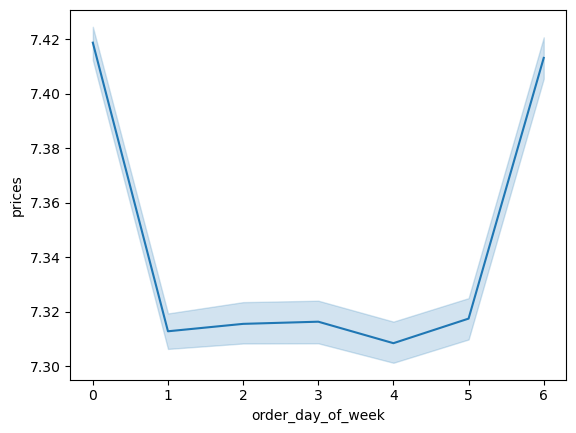

In [13]:
#line chart
line= sns.lineplot(data = df_2s, x = 'order_day_of_week',y = 'prices')

In [14]:
#export graph
line.figure.savefig(os.path.join('/Users/jessicagiron/Desktop/Instacart Basket Analysis 2023/04 Analysis/Visualizations/line_order_dow_prices.png'))

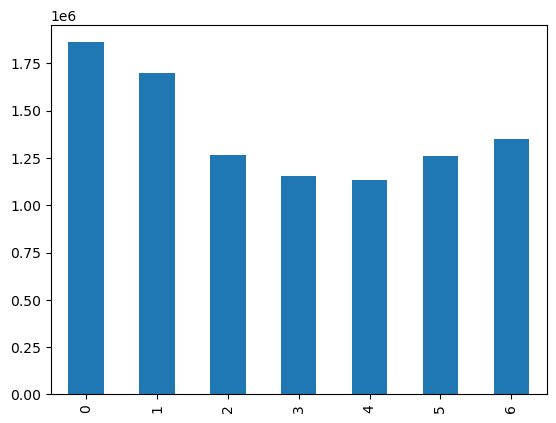

In [109]:
#bar chart 
bar_dow_freq=df_2s['order_day_of_week'].value_counts().sort_index().plot.bar()

In [110]:
#export
bar_dow_freq.figure.savefig(os.path.join('/Users/jessicagiron/Desktop/Instacart Basket Analysis 2023/04 Analysis/Visualizations/bar_dow_freq.png'))

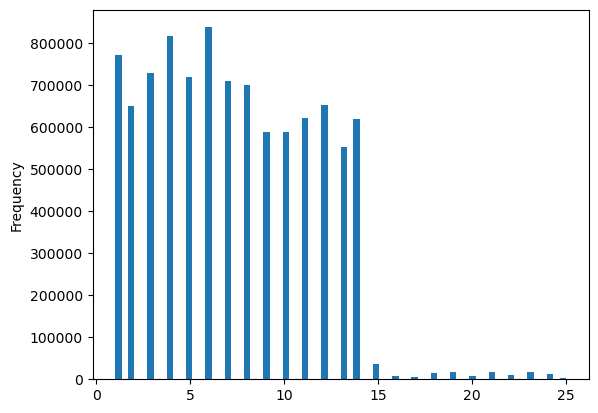

In [111]:
#histogram
hist_prices=df_2s['prices'].plot.hist(bins=70)

In [112]:
#expo
hist_prices.figure.savefig(os.path.join('/Users/jessicagiron/Desktop/Instacart Basket Analysis 2023/04 Analysis/Visualizations/hist_prices.png'))

<Axes: xlabel='prices', ylabel='prices'>

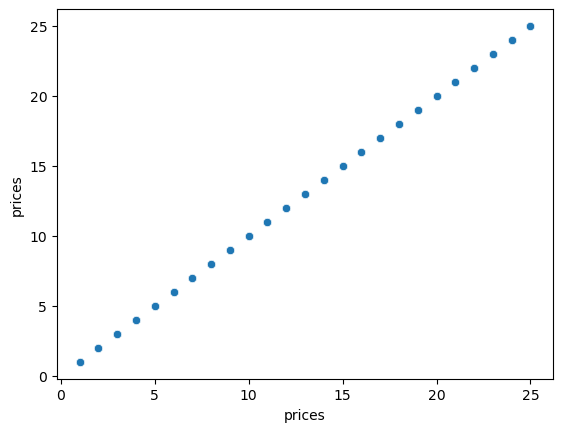

In [31]:
#scatter plot
sns.scatterplot(x = 'prices', y = 'prices',data = df_2s)

# Histogram: Descriptive Findings About Sales

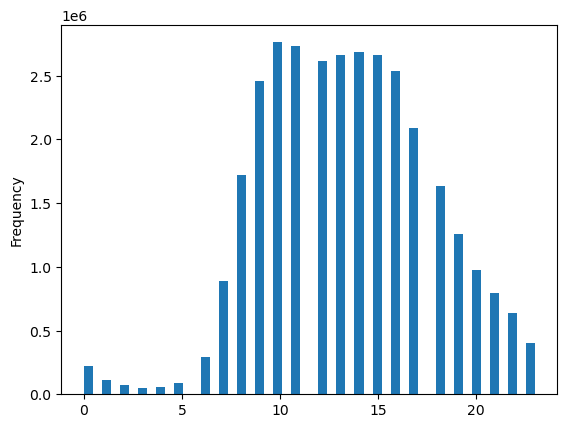

In [114]:
hist_hour_order_freq=df_instacart['order_hour_of_day'].plot.hist(bins=50)

In [115]:
#export
hist_hour_order_freq.figure.savefig(os.path.join('/Users/jessicagiron/Desktop/Instacart Basket Analysis 2023/04 Analysis/Visualizations/hist_hour_order_freq.png'))

Most number of order occur during the midst of day. From hours 9:00 to 17:00, one can expect high number of sales to come in. Outside of those hours will be slower. 1:00 to 5:00 are considered to be the slowest hours of the day. 

# Bar Chart: Distribution Among the Customers in Terms of Loyalty

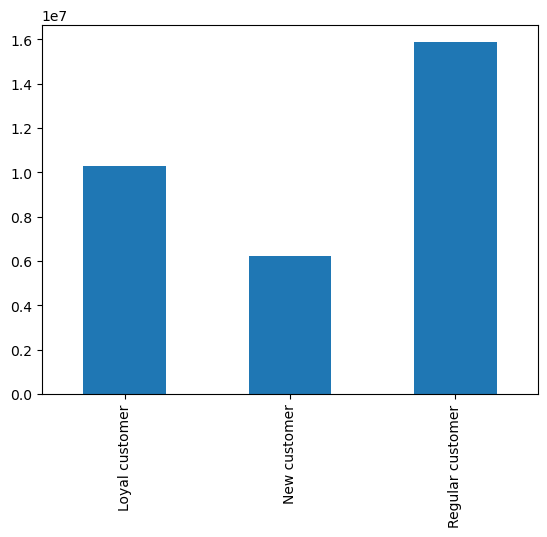

In [116]:
bar_loyalty=df_instacart['loyalty_flag'].value_counts().sort_index().plot.bar()

In [117]:
bar_loyalty.figure.savefig(os.path.join('/Users/jessicagiron/Desktop/Instacart Basket Analysis 2023/04 Analysis/Visualizations/bar_loyalty.png'))

# Line Chart: Difference in Expenditure Depending on Hour of the Day

In [51]:
#sample subset will be created
np.random.seed(5)
dev2 = np.random.rand(len(df_instacart)) <= 0.7

In [52]:
dev2

array([ True, False,  True, ...,  True, False,  True])

In [53]:
big2 = df_instacart[dev2]
small2 = df_instacart[~dev2]

In [54]:
len(big2)+len(small2)

32404859

In [55]:
df_3s = small2[['order_hour_of_day','prices']]

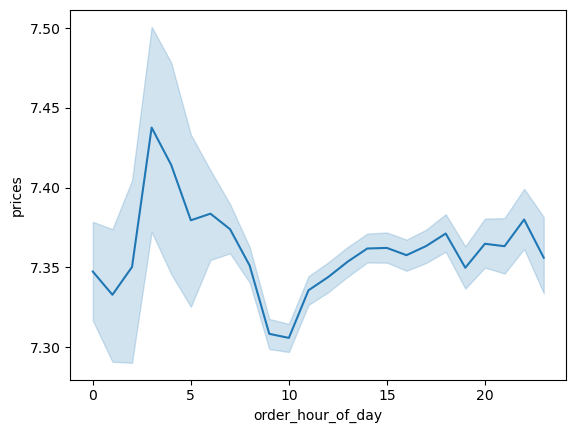

In [92]:
#line chart
line2 = sns.lineplot(data = df_3s, x = 'order_hour_of_day',y = 'prices')

In [118]:
line2.figure.savefig(os.path.join('/Users/jessicagiron/Desktop/Instacart Basket Analysis 2023/04 Analysis/Visualizations/line_hour_prices.png'))

# Line Chart: Relationship Between Age and Number of Dependents (Demographics)

In [57]:
#sample subset will be created
np.random.seed(6)
dev3 = np.random.rand(len(df_instacart)) <= 0.7

In [58]:
dev3

array([False,  True, False, ...,  True,  True,  True])

In [69]:
big3=df_instacart[dev3]
small3=df_instacart[~dev3]

In [70]:
len(big3)+len(small3)

32404859

In [71]:
df_4s=small3[['age','number_of_dependents']]

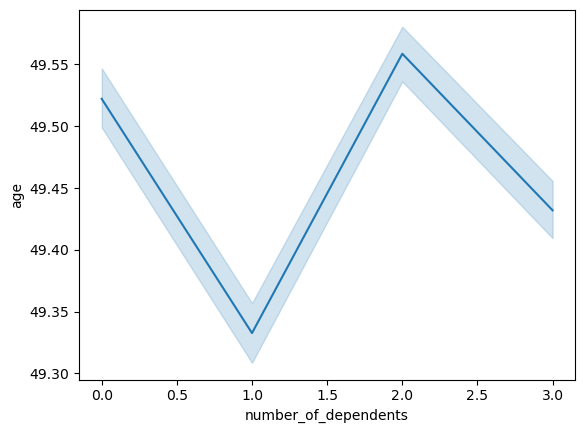

In [93]:
#line chart
line3 = sns.lineplot(data = df_4s, x = 'number_of_dependents',y = 'age')

In [120]:
#export
line3.figure.savefig(os.path.join('/Users/jessicagiron/Desktop/Instacart Basket Analysis 2023/04 Analysis/Visualizations/line_age_dependents.png'))

# Scatterplot: Relationship Between Age and Income

In [74]:
#create subset sample
np.random.seed(7)
dev4 = np.random.rand(len(df_instacart)) <= 0.7

In [75]:
dev4

array([ True, False,  True, ...,  True, False,  True])

In [76]:
big4=df_instacart[dev4]
small4=df_instacart[~dev4]

In [77]:
df_5s=small4[['age','income']]

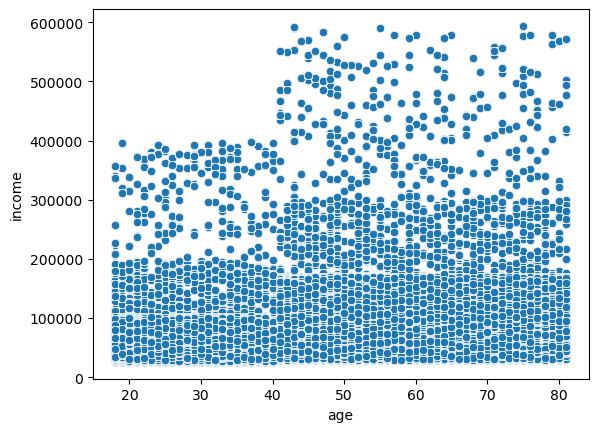

In [121]:
scatterplot2=sns.scatterplot(x = 'age', y = 'income',data = df_5s)

In [122]:
#export
scatterplot2.figure.savefig(os.path.join('/Users/jessicagiron/Desktop/Instacart Basket Analysis 2023/04 Analysis/Visualizations/scatplot_age_income.png'))

In [123]:
df_instacart.to_pickle(os.path.join('/Users/jessicagiron/Desktop/Instacart Basket Analysis 2023/02 Data/Prepared Data/df_instacart_visualizations.pkl'))